In [1]:
### Import packages ###
import time
import numpy as np
import math as math
import pandas as pd
import random as random

### Append Path ###
import sys
sys.path.append('..')

### Import functions ###
from utils.Main import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Prediction import *

# Inputs

In [2]:
### Get Directory ###
cwd = os.getcwd()
ParentDirectory = os.path.abspath(os.path.join(cwd, "..",".."))

### DataType ###
DataFileInput = "BHContinuous"
NSim = 100

## Passive Learning

In [3]:
### Passive Learning ###
PL_ErrorVector = []
for i in range(0,NSim):
    print(f"Iteration {i}")

    ## Run simulations ##
    SimulationConfigInput = {'DataFileInput': DataFileInput,
            'Seed': i,
            'TestProportion': 0.2,
            'CandidateProportion': 0.8,
            'SelectorType': 'PassiveLearningSelector',  
            'ModelType': 'LinearRegressionPredictor'}  
    PassiveLearning_Results = OneIterationFunction(SimulationConfigInput)


    ## Extract errors ##
    PassiveLearning_Results_df = PassiveLearning_Results["ErrorVec"].copy() # Use .copy() to be safe
    PassiveLearning_Results_df.rename(columns={'Error': f'Sim_{i}_Error'}, inplace=True)
    PL_ErrorVector.append(PassiveLearning_Results_df)

### Error vectors ###
PL_ErrorVector = pd.concat(PL_ErrorVector, axis=1)
# PL_ErrorVector.columns = range(0,NSim)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

# GSx

In [ ]:
### GSx ###
GSx_ErrorVector = []
for i in range(0,NSim):
    print(f"Iteration {i}")

    ## Run simulations ##
    SimulationConfigInput = {'DataFileInput': DataFileInput,
            'Seed': i,
            'TestProportion': 0.2,
            'CandidateProportion': 0.8,
            'SelectorType': 'GreedySamplingSelector',  
            'ModelType': 'LinearRegressionPredictor',
            "strategy": "GSx"}  
    GSx_Results = OneIterationFunction(SimulationConfigInput)


    ## Extract errors ##
    GSx_Results_df = GSx_Results["ErrorVec"].copy() # Use .copy() to be safe
    GSx_Results_df.rename(columns={'Error': f'Sim_{i}_Error'}, inplace=True)
    GSx_ErrorVector.append(GSx_Results_df)

### Error vectors ###
GSx_ErrorVector = pd.concat(GSx_ErrorVector, axis=1)
# GSx_ErrorVector.columns = range(0,NSim)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

## GSy

In [5]:
### GSy ###
GSy_ErrorVector = []
for i in range(0,NSim):
    print(f"Iteration {i}")

    ## Run simulations ##
    SimulationConfigInput = {'DataFileInput': DataFileInput,
            'Seed': i,
            'TestProportion': 0.2,
            'CandidateProportion': 0.8,
            'SelectorType': 'GreedySamplingSelector',  
            'ModelType': 'LinearRegressionPredictor',
            "strategy": "GSy"}  
    GSy_Results = OneIterationFunction(SimulationConfigInput)


    ## Extract errors ##
    GSy_Results_df = GSy_Results["ErrorVec"].copy() # Use .copy() to be safe
    GSy_Results_df.rename(columns={'Error': f'Sim_{i}_Error'}, inplace=True)
    GSy_ErrorVector.append(GSy_Results_df)

### Error vectors ###
GSy_ErrorVector = pd.concat(GSy_ErrorVector, axis=1)
# GSy_ErrorVector.columns = range(0,NSim)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

## iGS

In [6]:
### iGS ###
iGS_ErrorVector = []
for i in range(0,NSim):
    print(f"Iteration {i}")

    ## Run simulations ##
    SimulationConfigInput = {'DataFileInput': DataFileInput,
            'Seed': i,
            'TestProportion': 0.2,
            'CandidateProportion': 0.8,
            'SelectorType': 'GreedySamplingSelector',  
            'ModelType': 'LinearRegressionPredictor',
            "strategy": "iGS"}  
    iGS_Results = OneIterationFunction(SimulationConfigInput)


    ## Extract errors ##
    iGS_Results_df = iGS_Results["ErrorVec"].copy() # Use .copy() to be safe
    iGS_Results_df.rename(columns={'Error': f'Sim_{i}_Error'}, inplace=True)
    iGS_ErrorVector.append(iGS_Results_df)

### Error vectors ###
iGS_ErrorVector = pd.concat(iGS_ErrorVector, axis=1)
# iGS_ErrorVector.columns = range(0,NSim)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

# Simulation Results

In [7]:
PL_ErrorVector.shape

(324, 100)

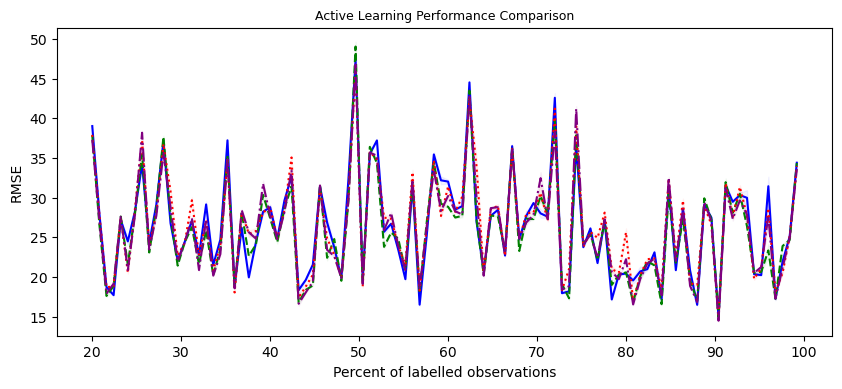

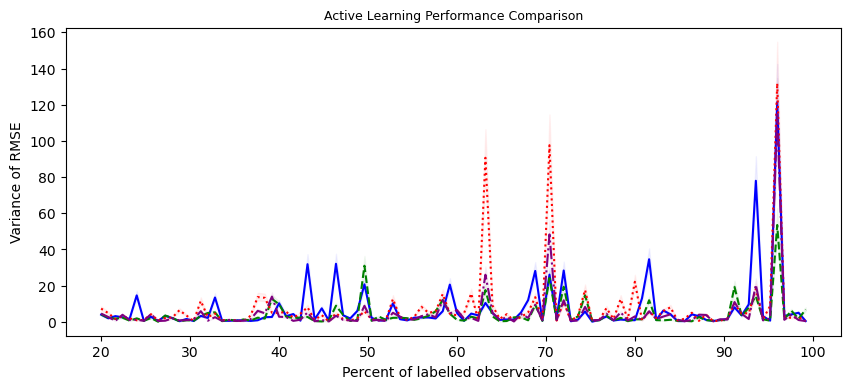

In [9]:
colors = {
    'Passive Learning': 'blue',
    'GSx': 'green',
    'GSy': 'red',
    'iGS': 'purple'
    # Add 'WiGS' if you run those simulations too
}

linestyles = {
    'Passive Learning': '-',
    'GSx': '--',
    'GSy': ':',
    'iGS': '-.'
    # Add 'WiGS' if you run those simulations too
}

LegendMapping = {
    'Passive Learning': 'Passive Learning',
    'GSx': 'Greedy Sampling (X-space)',
    'GSy': 'Greedy Sampling (Y-space)',
    'iGS': 'Interactive Greedy Sampling'
    # Add 'WiGS': 'Weighted iGS (Adaptive w)' if you run those simulations too
}

Y_Label = "RMSE" # As specified in your example call
PlotSubtitle = "Active Learning Performance Comparison" # Example subtitle

error_data_for_plot = {
    'Passive Learning': PL_ErrorVector,
    'GSx': GSx_ErrorVector,
    'GSy': GSy_ErrorVector,
    'iGS': iGS_ErrorVector
    # 'WiGS': WiGS_ErrorVector
}

# --- 3. Call MeanVariancePlot with your collected data ---
TracePlotMean, TracePlotVariance = MeanVariancePlot(
    RelativeError=None, # As in your example call
    Colors=colors,
    LegendMapping=LegendMapping,
    Linestyles=linestyles,
    Y_Label=Y_Label, # "F1 Score"
    Subtitle=PlotSubtitle,
    TransparencyVal=0.05,
    VarInput=True,
    CriticalValue=1.96,
    **error_data_for_plot # This unpacks the dictionary into keyword arguments
)